### Set the random seed to 42 control variations

In [1]:
import os
import random
random.seed(42)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_json('../input/News_Category_Dataset_v3.json',lines=True)
beforeMay2018 = df[pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')<="2019-01-31"]

required_columns = ["BLACK VOICES",
                    "COMEDY",
                    "CRIME",
                    "DIVORCE",
                    "GREEN",
                    "HOME & LIVING",
                    "IMPACT",
                    "MEDIA",
                    "PARENTS",
                    "RELIGION",
                    "SPORTS",
                    "STYLE",
                    "THE WORLDPOST",
                    "WEDDINGS",
                    "WEIRD NEWS",
                    "WOMEN",
                    "WORLD NEWS",
                    "WORLDPOST"]
df = df[df["date"] < "2018-05-26"]
df = df[df["category"].isin(required_columns)]

df.drop(['authors', 'link', 'date'], axis = 1, inplace = True)

df.head()

,headline,category,short_description
8697,North Korea Still Open To Talks After Trump Ca...,WORLD NEWS,Trump’s announcement came after repeated threa...
8698,2 Men Detonate Bomb Inside Indian Restaurant N...,WORLD NEWS,"Fifteen people were taken to the hospital, thr..."
8699,Thousands Travel Home To Ireland To Vote On Ab...,WORLD NEWS,Just try to read these #HomeToVote tweets with...
8700,Irish Voters Set To Liberalize Abortion Laws I...,WORLD NEWS,Vote counting will begin Saturday.
8701,Warriors Coach Steve Kerr Calls NFL Ban On Pro...,BLACK VOICES,Forbidding players to take a knee during the n...


In [5]:
categories = df['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            df.loc[df['category'] == ele, 'category'] = name

In [6]:
groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

groupper( grouplist= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

groupper( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISC')

In [7]:
print("We have a total of {} categories now".format(df['category'].nunique()))
df['category'].value_counts()

We have a total of 8 categories now


SPORTS AND ENTERTAINMENT    12727
MISC                        12448
WORLDNEWS                    8419
EMPOWERED VOICES             8018
GENERAL                      6862
LIFESTYLE AND WELLNESS       6449
PARENTING AND EDUCATION      3955
ENVIRONMENT                  2622
Name: category, dtype: int64

In [8]:
#from https://www.kaggle.com/code/dima806/news-category-classification-distilbert

item0 = df.shape[0]  # Store the initial number of items in the DataFrame
df = df.drop_duplicates()  # Remove duplicate rows from the DataFrame
item1 = df.shape[0]  # Store the number of items in the DataFrame after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Print the number of duplicates removed

df = df.rename(columns={'category': 'label'})  # Rename the 'category' column to 'label'

df['title'] = df['headline'] + ' ' + df['short_description']  # Create a new 'title' column by combining 'headline' and 'short_description'

df = df[['label', 'title']]  # Select only the 'label' and 'title' columns
df = df[~df['title'].isnull()]  # Remove rows where 'title' is null
df = df[~df['label'].isnull()]  # Remove rows where 'label' is null

print(df.shape)  # Print the shape of the DataFrame after data preprocessing
df.sample(5).T  # Display a random sample of 5 rows from the DataFrame

There are 218 duplicates found in the dataset
(61282, 2)


,76284,114777,58088,21123,155969
label,EMPOWERED VOICES,MISC,MISC,WORLDNEWS,LIFESTYLE AND WELLNESS
title,"Roots Picnic 2016 Will Bring Usher, Future, Sw...",With a Grateful Heart Sometimes it is in these...,Jewish Artist Turns Swastika Vandalism Into So...,The Middle East: It Will Only Get Worse As Sau...,Throw a Top Secret Surprise Party Try keeping ...


In [9]:

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [10]:
!pip install neattext

In [11]:
import neattext.functions as nfx
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
tknzr = nltk.tokenize

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tknzr.word_tokenize(text)]

corpus = df['title'].astype(str)
corpus = corpus.apply(nfx.remove_stopwords)
corpus = corpus.apply(nfx.remove_special_characters)
corpus = corpus.apply(nfx.remove_multiple_spaces)
corpus = corpus.str.lower()
corpus = corpus.apply(lemmatize_text)

df['title'] = corpus

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Tidying

In [12]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [13]:
df.head()

,label,title
0,MISC,"[surely, known, worst, thing, cheated, others,..."
1,GENERAL,"[nonprofit, social, medium, turning, offline, ..."
2,GENERAL,"[1, child, dy, 21, second, waterrelated, disea..."
3,GENERAL,"[finding, soulmate, new, madrid, fault, met, g..."
4,LIFESTYLE AND WELLNESS,"[7, powerful, feng, shui, tip, bring, love, be..."


# Tokenizing and Padding

In [14]:
from collections import Counter
# code adapted from #https://www.kaggle.com/code/mehmetlaudatekman/tutorial-word-embeddings-with-svm
# optimized (resources and time) using chat gpt

class Sequencer():
    def __init__(self, all_words, max_vocab_words, embedding_matrix):
        self.embed_matrix = embedding_matrix

        # Count word occurrences efficiently
        word_counts = Counter(all_words)

        # Get the top 'max_vocab_words' most common words
        self.vocab = [word for word, _ in word_counts.most_common(max_vocab_words)]

    def textToVector(self,tokens):
        # First we need to split the text into its tokens and learn the length
        # For any amount of words inputted, we get the sentence vector for a particular input

        vec = [np.zeros(300, )] # initialise with zeros
        for tok in tokens:
            #for tok in tokens[:len_v+1]:
            try:
                #for each matching token, append it
                vec.append(self.embed_matrix.get_vector(tok, norm=True))
            except Exception as E:
                #vec.append(np.random.normal(0,np.sqrt(0.25),300))
                pass

        # extract vectors per token, and then sum them
        return np.sum(vec, axis=0).flatten().tolist()

In [15]:

from gensim.models.keyedvectors import KeyedVectors
import time

start = time.time()
pre_trained_model_wv = KeyedVectors.load_word2vec_format('../input/GoogleNews-vectors-negative300.bin.gz', binary=True)

end = round(time.time()-start,2)
print("This process took",end,"seconds.")



This process took 47.53 seconds.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA


X,Y = df['title'],df['label']
#80% to train , 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

#print(X_train[0])


In [17]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [18]:
from sklearn.preprocessing import StandardScaler
sequencer=Sequencer(all_words = [token for seq in X for token in seq], max_vocab_words = 20000, embedding_matrix = pre_trained_model_wv)
x_train_vecs = np.asarray([sequencer.textToVector(tokens) for tokens in X_train])
x_test_vecs = np.asarray([sequencer.textToVector(tokens) for tokens in X_test])
scaler = StandardScaler().fit(x_train_vecs)
x_train_vecs = scaler.transform(x_train_vecs)
x_test_vecs = scaler.transform(x_test_vecs)
print(x_train_vecs.shape)
print(x_test_vecs.shape)

(49025, 300)
(12257, 300)


In [19]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle
#chat gpt

# Assuming y is your 1D array of string category labels
y_target = set(y_test)

# Step 1: Use LabelEncoder to convert string labels to integer IDs
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Print the results
print("Original labels:", y_target)
print("Y_train: Encoded labels (integer IDs):", y_train)
print("Y_test: Encoded labels (integer IDs):", y_test)

#chat gpt
encoder_mappings = {
    'class_labels': label_encoder.classes_.tolist(),
    'integer_to_label': dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_)),
    'label_to_integer': dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
}
print(encoder_mappings)

Original labels: {'SPORTS AND ENTERTAINMENT', 'PARENTING AND EDUCATION', 'MISC', 'WORLDNEWS', 'EMPOWERED VOICES', 'GENERAL', 'LIFESTYLE AND WELLNESS', 'ENVIRONMENT'}
Y_train: Encoded labels (integer IDs): [7 2 3 ... 6 6 2]
Y_test: Encoded labels (integer IDs): [3 4 2 ... 4 2 6]
{'class_labels': ['EMPOWERED VOICES', 'ENVIRONMENT', 'GENERAL', 'LIFESTYLE AND WELLNESS', 'MISC', 'PARENTING AND EDUCATION', 'SPORTS AND ENTERTAINMENT', 'WORLDNEWS'], 'integer_to_label': {0: 'EMPOWERED VOICES', 1: 'ENVIRONMENT', 2: 'GENERAL', 3: 'LIFESTYLE AND WELLNESS', 4: 'MISC', 5: 'PARENTING AND EDUCATION', 6: 'SPORTS AND ENTERTAINMENT', 7: 'WORLDNEWS'}, 'label_to_integer': {'EMPOWERED VOICES': 0, 'ENVIRONMENT': 1, 'GENERAL': 2, 'LIFESTYLE AND WELLNESS': 3, 'MISC': 4, 'PARENTING AND EDUCATION': 5, 'SPORTS AND ENTERTAINMENT': 6, 'WORLDNEWS': 7}}


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


start = time.time()

svm_classifier = make_pipeline(StandardScaler(), SVC(C=10, kernel='rbf', gamma=0.001))
svm_classifier.fit(x_train_vecs,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 497.58 seconds


In [21]:
from sklearn.metrics import classification_report
y_pred = svm_classifier.predict(x_test_vecs)

In [22]:
target_names=["EMPOWERED VOICES","ENVIRONMENT","GENERAL","LIFESTYLE AND WELLNESS","MISC","PARENTING AND EDUCATION","SPORTS AND ENTERTAINMENT","WORLDNEWS"]


In [23]:

print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.62      0.59      0.60      1586
             ENVIRONMENT       0.66      0.68      0.67       523
                 GENERAL       0.62      0.60      0.61      1372
  LIFESTYLE AND WELLNESS       0.80      0.82      0.81      1282
                    MISC       0.79      0.76      0.77      2487
 PARENTING AND EDUCATION       0.70      0.66      0.68       779
SPORTS AND ENTERTAINMENT       0.71      0.80      0.75      2544
               WORLDNEWS       0.82      0.77      0.80      1684

                accuracy                           0.73     12257
               macro avg       0.72      0.71      0.71     12257
            weighted avg       0.73      0.73      0.72     12257



Text(0.5, 1.0, 'Confusion matrix of model')

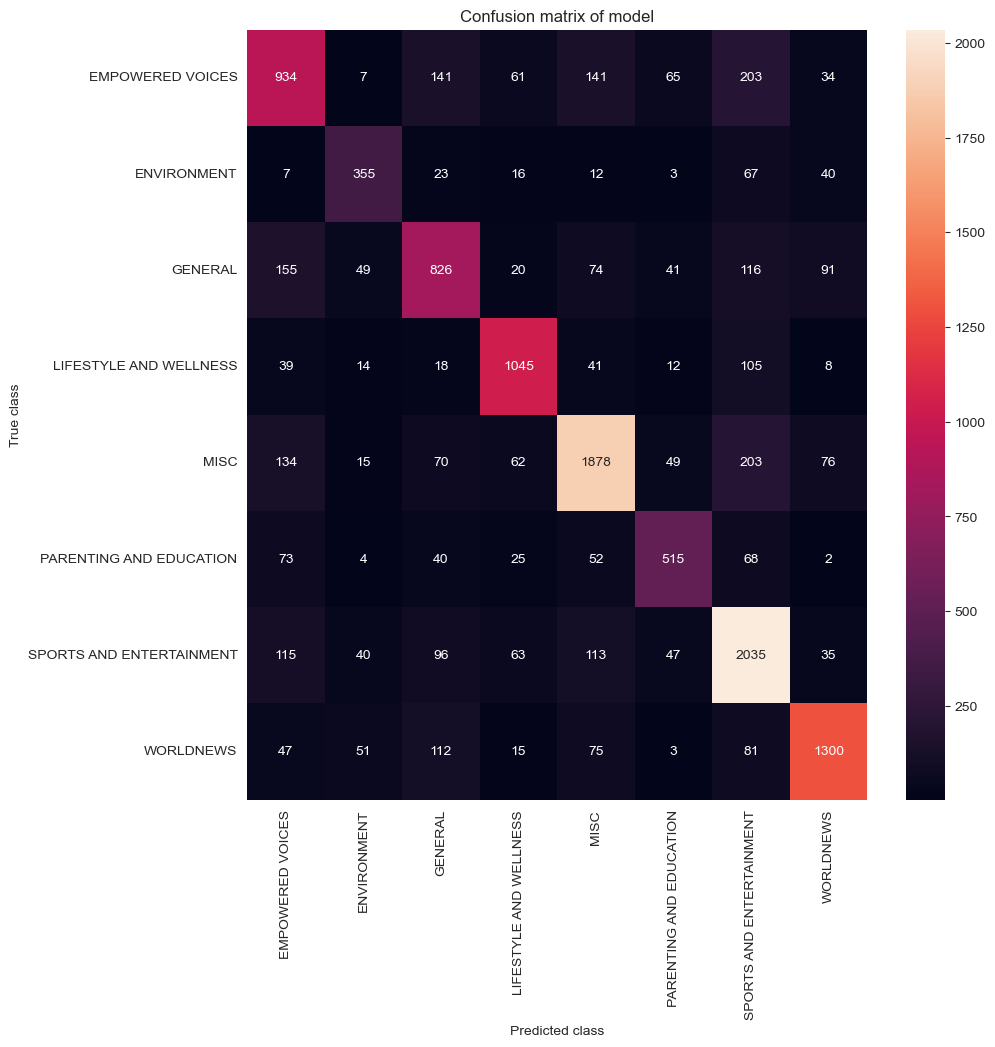

In [24]:
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')
#svm_classifier.score(x_test_vecs,y_test)

### Export best model

In [25]:
import pickle
name= "rbf_svm_c_10_gamma_0_001_test.pickle"
full_path = f"./saved_models/{name}"
# save
with open(full_path,'wb') as f:
    pickle.dump(svm_classifier, f)

# load
with open(full_path, 'rb') as f:
    clf3 = pickle.load(f)

clf3.predict(x_test_vecs)


array([3, 4, 0, ..., 4, 2, 6])

### Experiment with PCA (lower 300 dimensions to 10 dimensions)

Support Vector Machine Classifier has fitted, this process took 108.28 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.45      0.25      0.32      1586
             ENVIRONMENT       0.53      0.25      0.34       523
                 GENERAL       0.49      0.46      0.47      1372
  LIFESTYLE AND WELLNESS       0.67      0.61      0.64      1282
                    MISC       0.60      0.60      0.60      2487
 PARENTING AND EDUCATION       0.49      0.42      0.45       779
SPORTS AND ENTERTAINMENT       0.51      0.74      0.61      2544
               WORLDNEWS       0.65      0.70      0.67      1684

                accuracy                           0.56     12257
               macro avg       0.55      0.50      0.51     12257
            weighted avg       0.55      0.56      0.54     12257



Text(0.5, 1.0, 'Confusion matrix of model')

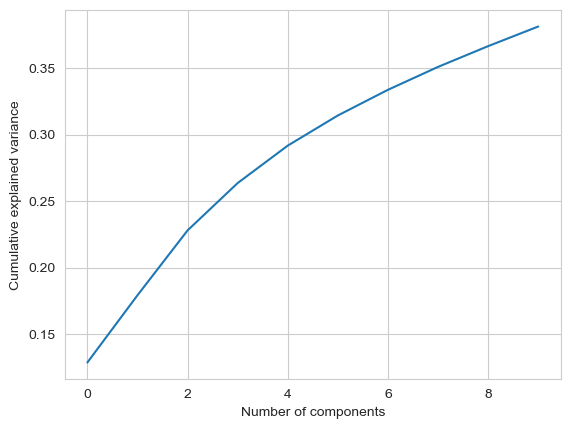

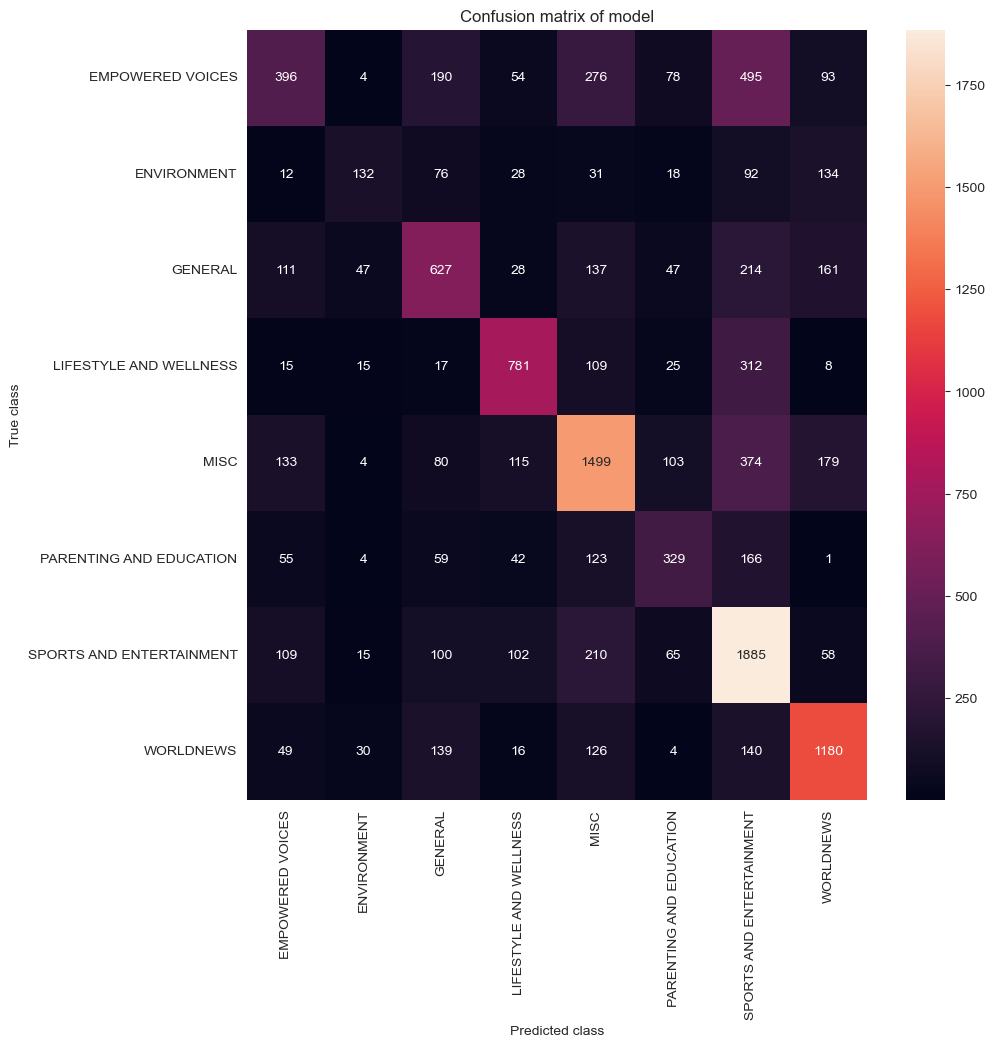

Sum of variance ratios:  0.38120284570462964
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 10)
(12257, 10)
Support Vector Machine Classifier has fitted, this process took 112.91 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.45      0.25      0.32      1586
             ENVIRONMENT       0.52      0.25      0.34       523
                 GENERAL       0.49      0.46      0.47      1372
  LIFESTYLE AND WELLNESS       0.67      0.61      0.64      1282
                    MISC       0.60      0.60      0.60      2487
 PARENTING AND EDUCATION       0.49      0.42      0.45       779
SPORTS AND ENTERTAINMENT       0.51      0.74      0.61      2544
               WORLDNEWS       0.65      0.70      0.67      1684

                accuracy                           0.56     12257
               macro avg       0.55      0.50      0.51     12257
            weighted avg       0.55      0.56      0.54     12257



Text(0.5, 1.0, 'Confusion matrix of model')

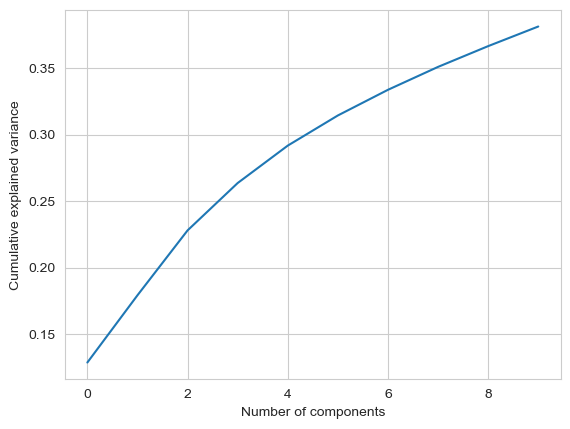

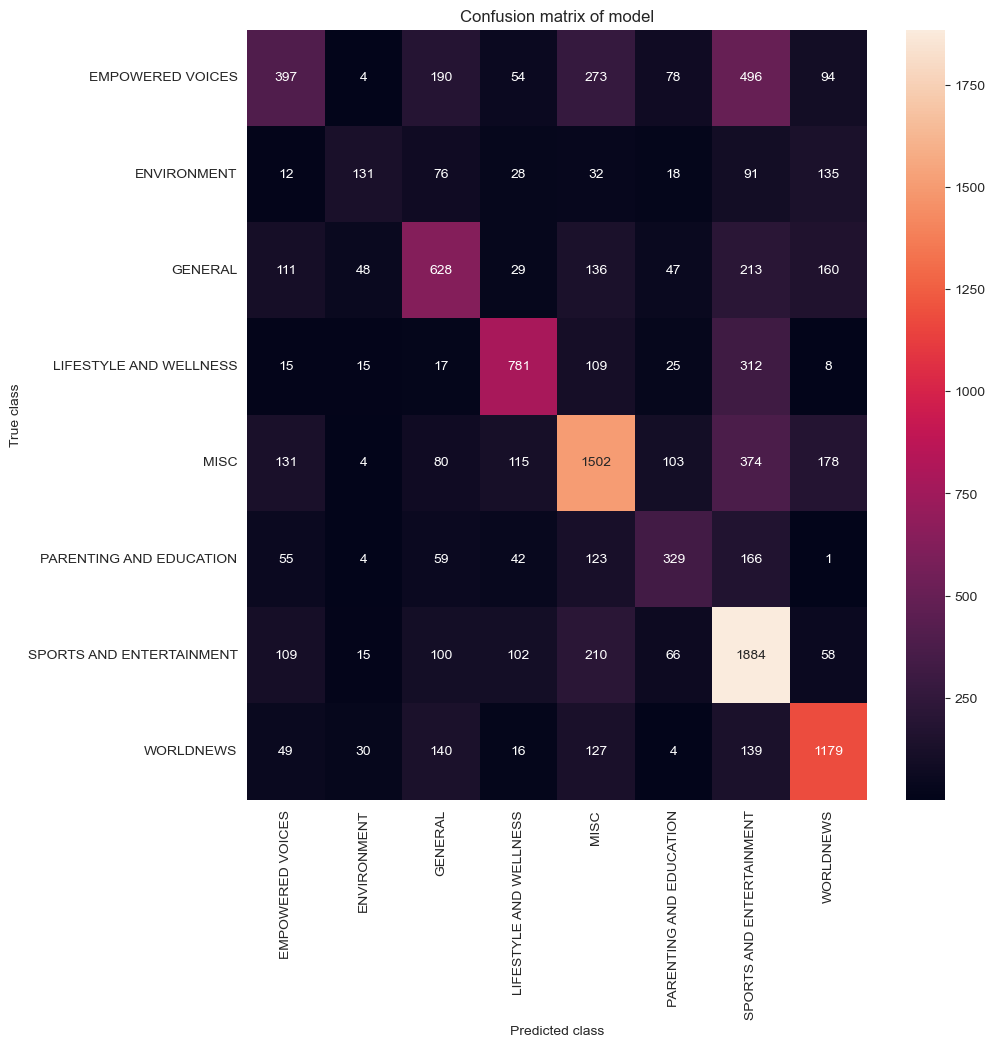

In [61]:

pca_model = PCA(n_components=10)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_10 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001))
clf_pca_10.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_10.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### Experiment with PCA (lower 300 dimensions to 30 dimensions)

Sum of variance ratios:  0.5374846439818046
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 30)
(12257, 30)
Support Vector Machine Classifier has fitted, this process took 147.7 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.55      0.47      0.51      1586
             ENVIRONMENT       0.62      0.54      0.58       523
                 GENERAL       0.57      0.53      0.55      1372
  LIFESTYLE AND WELLNESS       0.74      0.73      0.74      1282
                    MISC       0.71      0.66      0.69      2487
 PARENTING AND EDUCATION       0.62      0.59      0.61       779
SPORTS AND ENTERTAINMENT       0.61      0.77      0.68      2544
               WORLDNEWS       0.76      0.74      0.75      1684

                accuracy                           0.65     12257
               macro avg       0.65      0.63      0.64     12257
            weighted avg       0.65      0.65      0.65     12257



Text(0.5, 1.0, 'Confusion matrix of model')

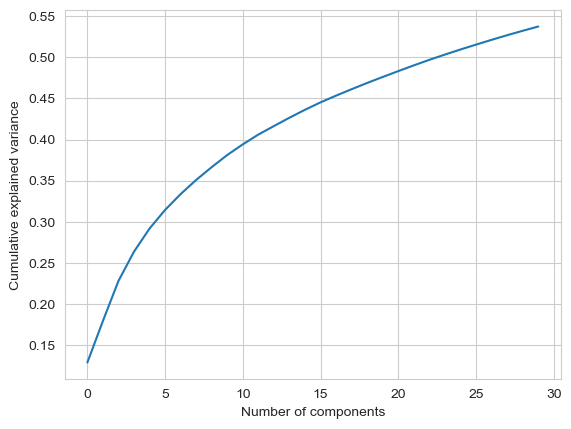

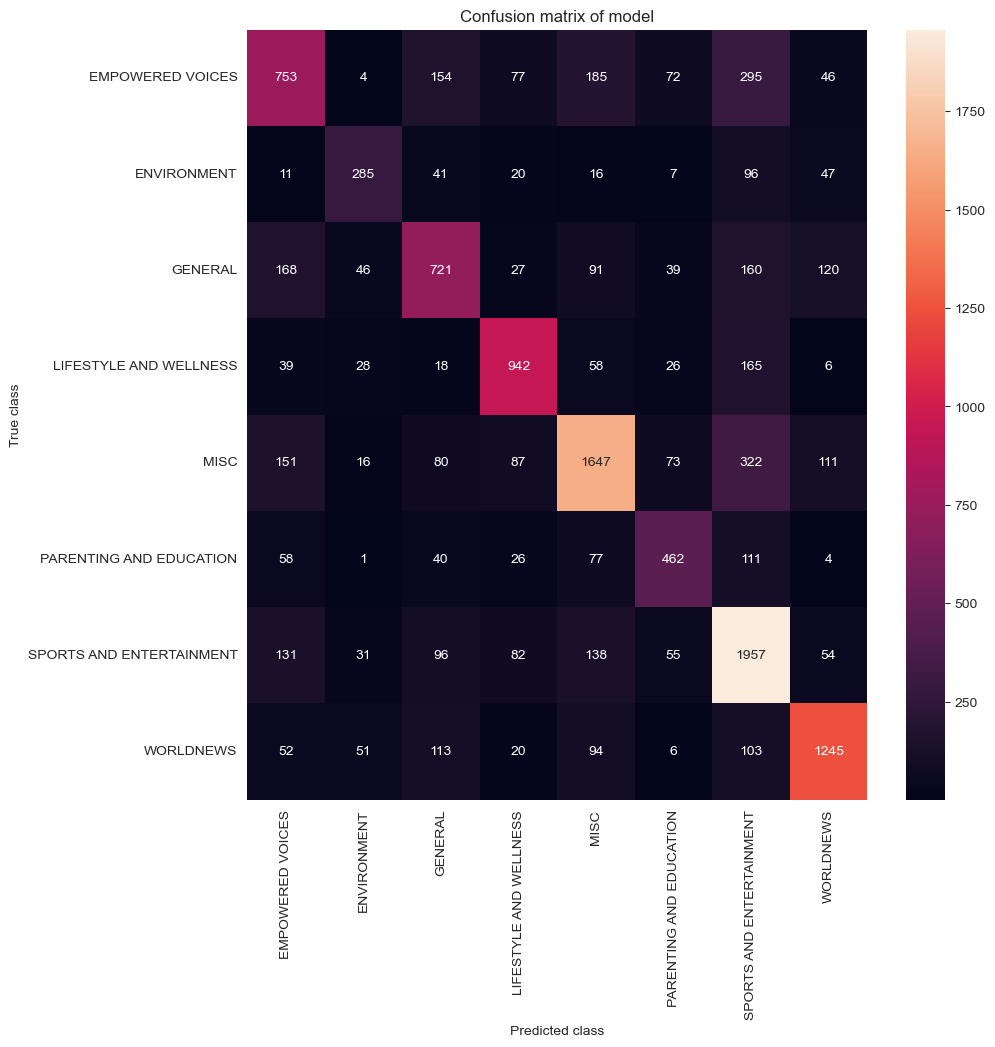

In [62]:

pca_model = PCA(n_components=30)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_30 =  make_pipeline(StandardScaler(), SVC(kernel='rbf', C=30, gamma=0.001))
clf_pca_30.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_30.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### Experiment with PCA (lower 300 dimensions to 50 dimensions)

Sum of variance ratios:  0.6244255213184531
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 50)
(12257, 50)
Support Vector Machine Classifier has fitted, this process took 188.59 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.57      0.49      0.53      1586
             ENVIRONMENT       0.63      0.57      0.60       523
                 GENERAL       0.59      0.54      0.56      1372
  LIFESTYLE AND WELLNESS       0.74      0.75      0.75      1282
                    MISC       0.73      0.68      0.70      2487
 PARENTING AND EDUCATION       0.64      0.60      0.62       779
SPORTS AND ENTERTAINMENT       0.62      0.78      0.69      2544
               WORLDNEWS       0.77      0.75      0.76      1684

                accuracy                           0.67     12257
               macro avg       0.66      0.64      0.65     12257
            weighted avg       0.67      0.67      0.66     12257



Text(0.5, 1.0, 'Confusion matrix of model')

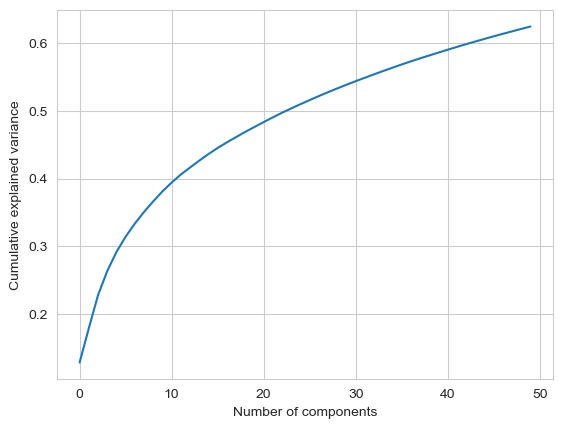

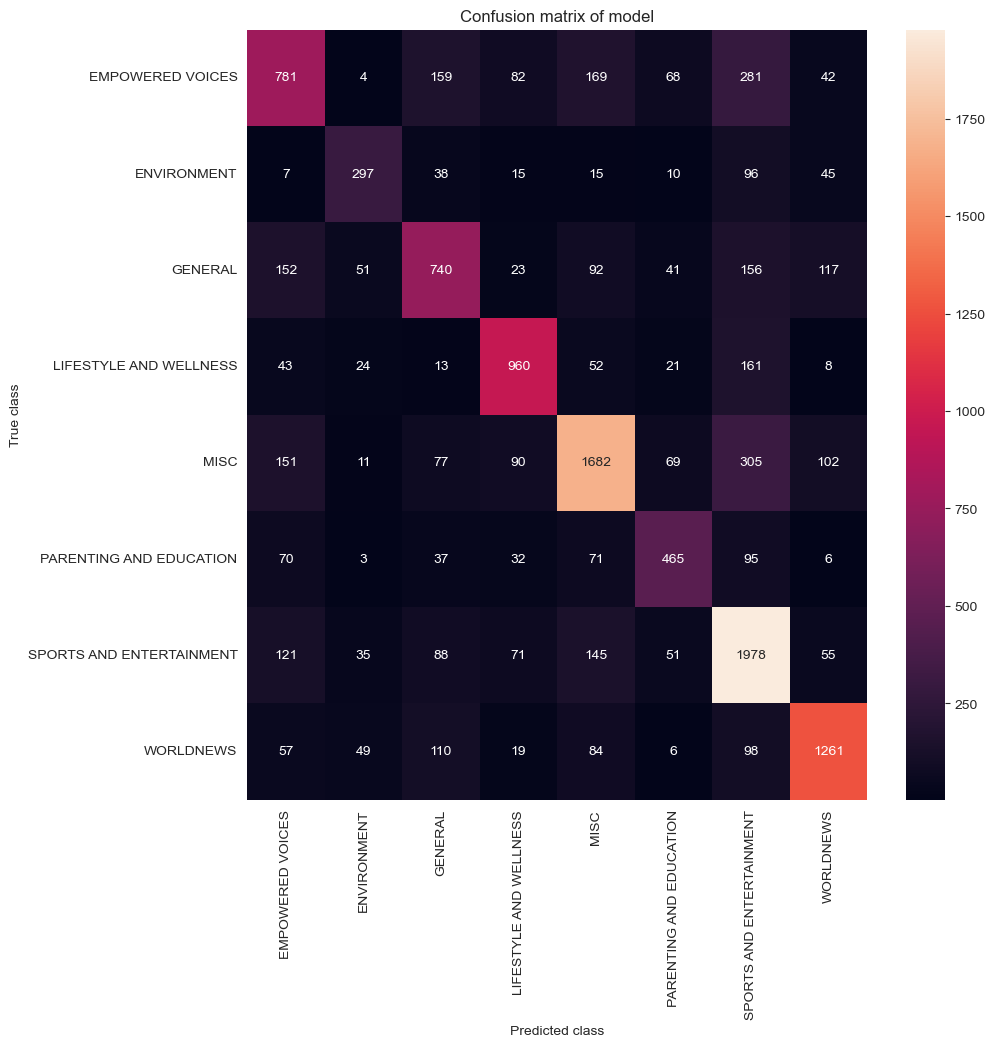

In [63]:

pca_model = PCA(n_components=50)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_50 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001))
clf_pca_50.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_50.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### Experiment with PCA (lower 300 dimensions to 90 dimensions)

Sum of variance ratios:  0.7417504456670014
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 90)
(12257, 90)
Support Vector Machine Classifier has fitted, this process took 248.78 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.59      0.55      0.57      1586
             ENVIRONMENT       0.66      0.61      0.64       523
                 GENERAL       0.61      0.56      0.59      1372
  LIFESTYLE AND WELLNESS       0.76      0.77      0.77      1282
                    MISC       0.75      0.71      0.73      2487
 PARENTING AND EDUCATION       0.66      0.61      0.63       779
SPORTS AND ENTERTAINMENT       0.64      0.78      0.71      2544
               WORLDNEWS       0.80      0.75      0.77      1684

                accuracy                           0.69     12257
               macro avg       0.69      0.67      0.68     12257
            weighted avg       0.69      0.69      0.69     12257



Text(0.5, 1.0, 'Confusion matrix of model')

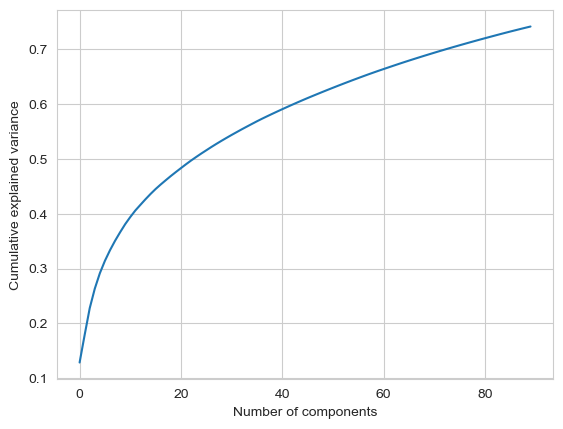

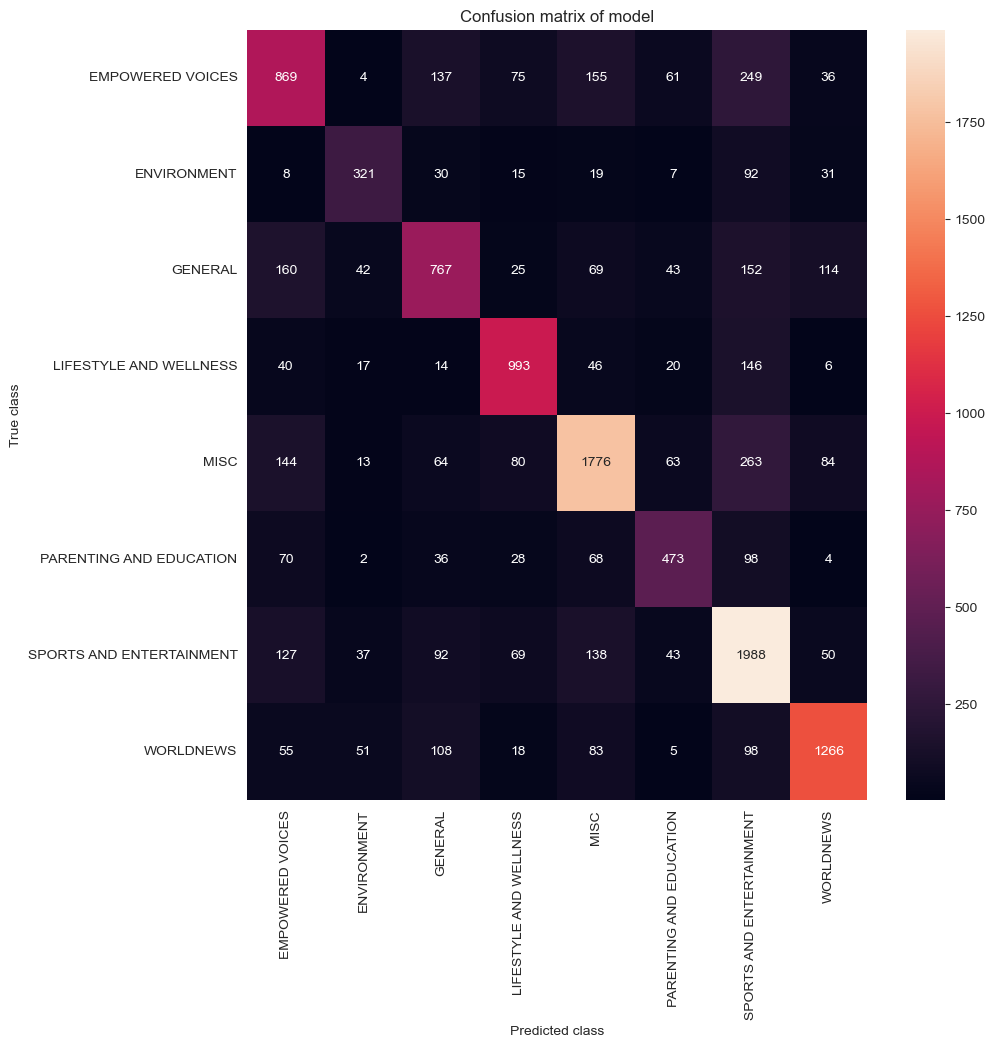

In [64]:

pca_model = PCA(n_components=90)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_90 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001))
clf_pca_90.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_90.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### PCA Experiment with PCA (lower 300 dimensions to 150 dimensions)

Sum of variance ratios:  0.85726782819826
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 150)
(12257, 150)
Support Vector Machine Classifier has fitted, this process took 327.03 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.61      0.57      0.59      1586
             ENVIRONMENT       0.67      0.63      0.65       523
                 GENERAL       0.62      0.57      0.60      1372
  LIFESTYLE AND WELLNESS       0.78      0.79      0.78      1282
                    MISC       0.77      0.73      0.75      2487
 PARENTING AND EDUCATION       0.68      0.62      0.65       779
SPORTS AND ENTERTAINMENT       0.66      0.79      0.72      2544
               WORLDNEWS       0.80      0.76      0.78      1684

                accuracy                           0.70     12257
               macro avg       0.70      0.68      0.69     12257
            weighted avg       0.71      0.70      0.70     12257



Text(0.5, 1.0, 'Confusion matrix of model')

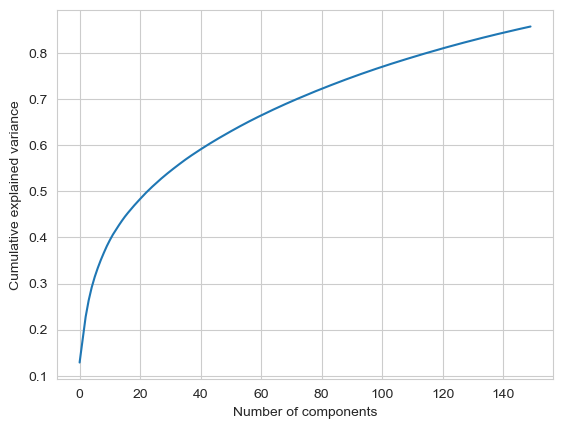

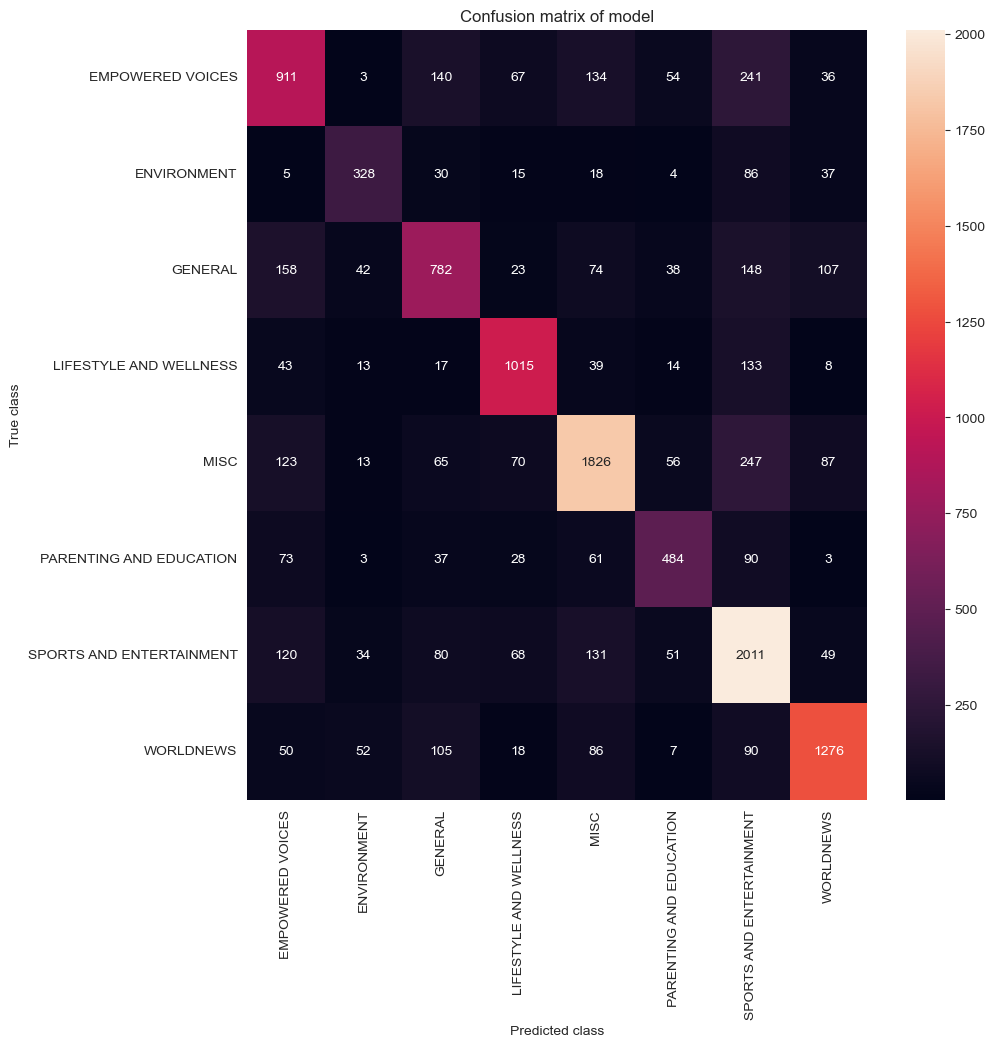

In [65]:

pca_model = PCA(n_components=150)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_150 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001))
clf_pca_150.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_150.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### PCA Experiment with PCA (lower 300 dimensions to 210 dimensions)

Sum of variance ratios:  0.9343176772592349
before pca
(49025, 300)
(12257, 300)
after pca
(49025, 210)
(12257, 210)
Support Vector Machine Classifier has fitted, this process took 458.04 seconds
                          precision    recall  f1-score   support

        EMPOWERED VOICES       0.62      0.58      0.60      1586
             ENVIRONMENT       0.66      0.64      0.65       523
                 GENERAL       0.62      0.57      0.60      1372
  LIFESTYLE AND WELLNESS       0.79      0.80      0.79      1282
                    MISC       0.76      0.74      0.75      2487
 PARENTING AND EDUCATION       0.70      0.64      0.67       779
SPORTS AND ENTERTAINMENT       0.68      0.79      0.73      2544
               WORLDNEWS       0.81      0.76      0.78      1684

                accuracy                           0.71     12257
               macro avg       0.70      0.69      0.70     12257
            weighted avg       0.71      0.71      0.71     12257



Text(0.5, 1.0, 'Confusion matrix of model')

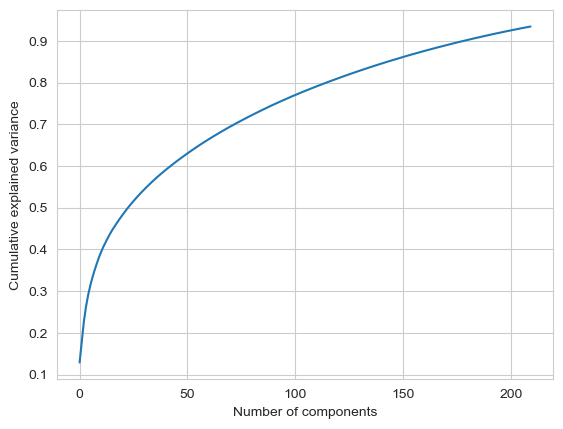

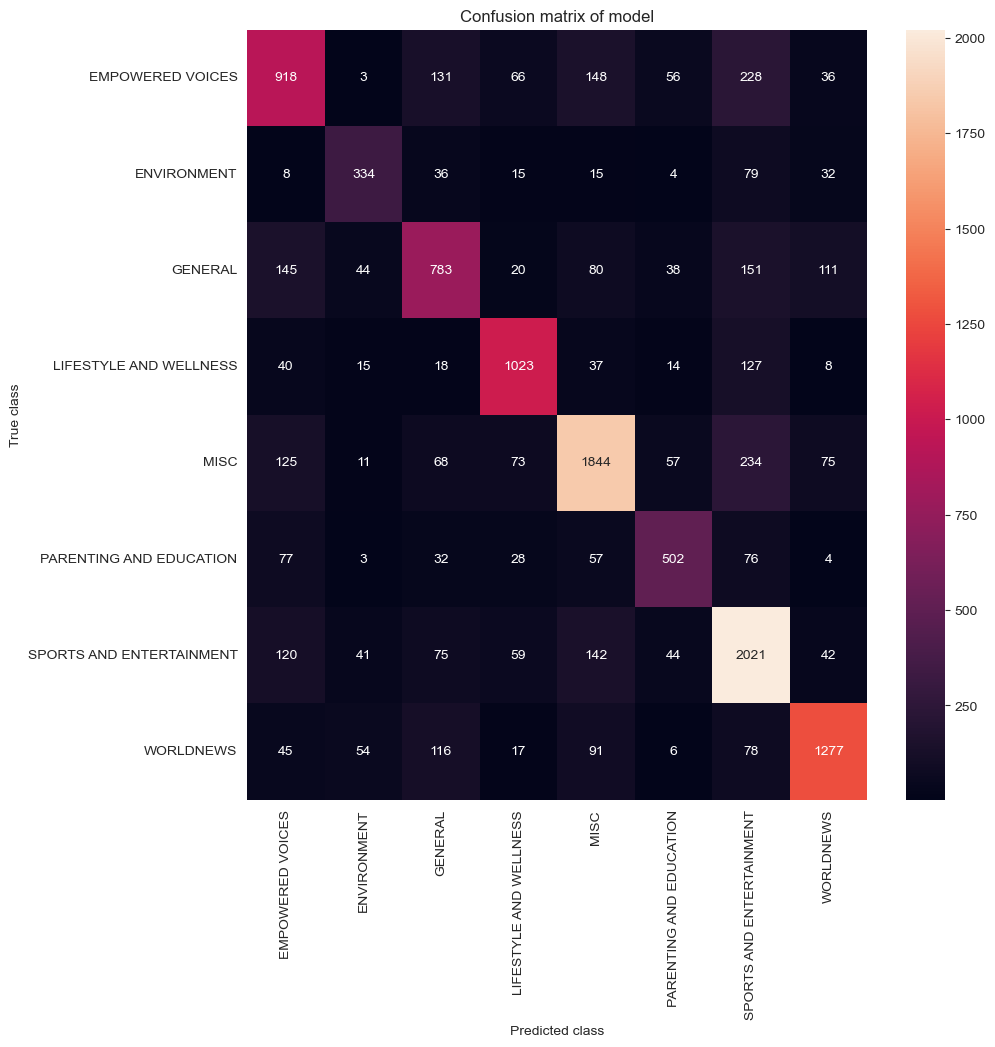

In [67]:

pca_model = PCA(n_components=210)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

x_comps_train = pca_model.transform(x_train_vecs)
print("before pca")
print(x_train_vecs.shape)
print(x_test_vecs.shape)

x_comps_test = pca_model.transform(x_test_vecs)
print("after pca")
print(x_comps_train.shape)
print(x_comps_test.shape)
import time

start = time.time()

clf_pca_210 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001))
clf_pca_210.fit(x_comps_train, y_train)

end = time.time()
process = round(end - start, 2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
y_pred_pca = clf_pca_210.predict(x_comps_test)

print(classification_report(y_test, y_pred_pca, target_names=target_names))
from sklearn.metrics._classification import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(cf_matrix, xticklabels=target_names,
                      yticklabels=target_names,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

### PCA Sum of Variance Ratio from 0-300 components

Sum of variance ratios:  0.9999999999999998


Text(0, 0.5, 'Cumulative explained variance')

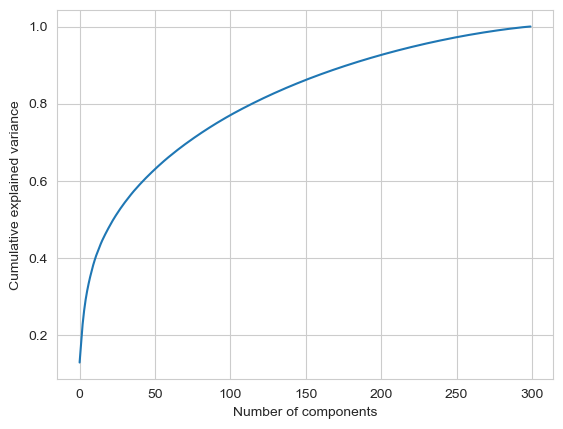

In [68]:

pca_model = PCA(n_components=300)
pca_model.fit(x_train_vecs)
print("Sum of variance ratios: ", sum(pca_model.explained_variance_ratio_))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')